# LetsGrowMore: Data Science

# Task 1 : Iris Flower Classification ML Project

# Name of Intern: Sachin Kumar Verma

# Loading Packages and Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('iris.csv')

In [3]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
data.tail(7)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.shape

(150, 5)

In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Data Analysis

In [10]:
sns.set()

## Histplot for Distribution checking

### SepalLengthCm distribution

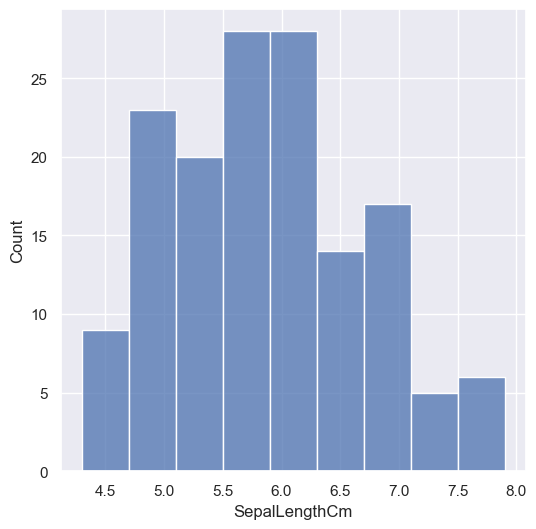

In [11]:
plt.figure(figsize=(6,6))
sns.histplot(data['SepalLengthCm'])
plt.show()

### SepalWidthCm distribution

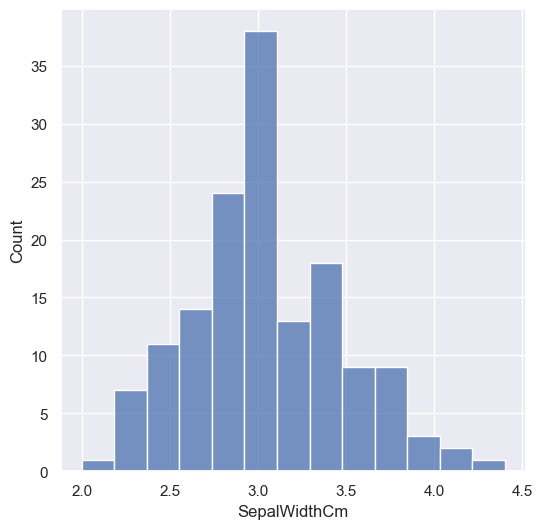

In [12]:
plt.figure(figsize=(6,6))
sns.histplot(data['SepalWidthCm'])
plt.show()

### PetalLengthCm distribution

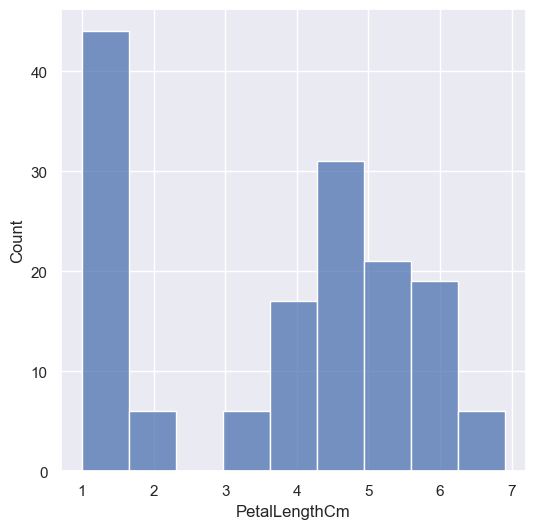

In [13]:
plt.figure(figsize=(6,6))
sns.histplot(data['PetalLengthCm'])
plt.show()

### PetalWidthCm distribution

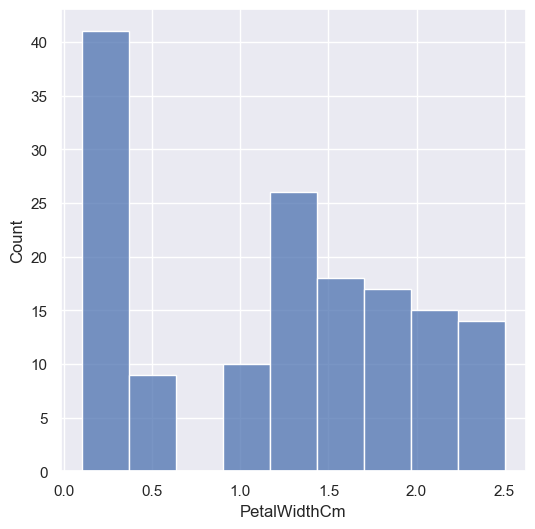

In [14]:
plt.figure(figsize=(6,6))
sns.histplot(data['PetalWidthCm'])
plt.show()

## Box plot for outlier checking

<Axes: ylabel='PetalWidthCm'>

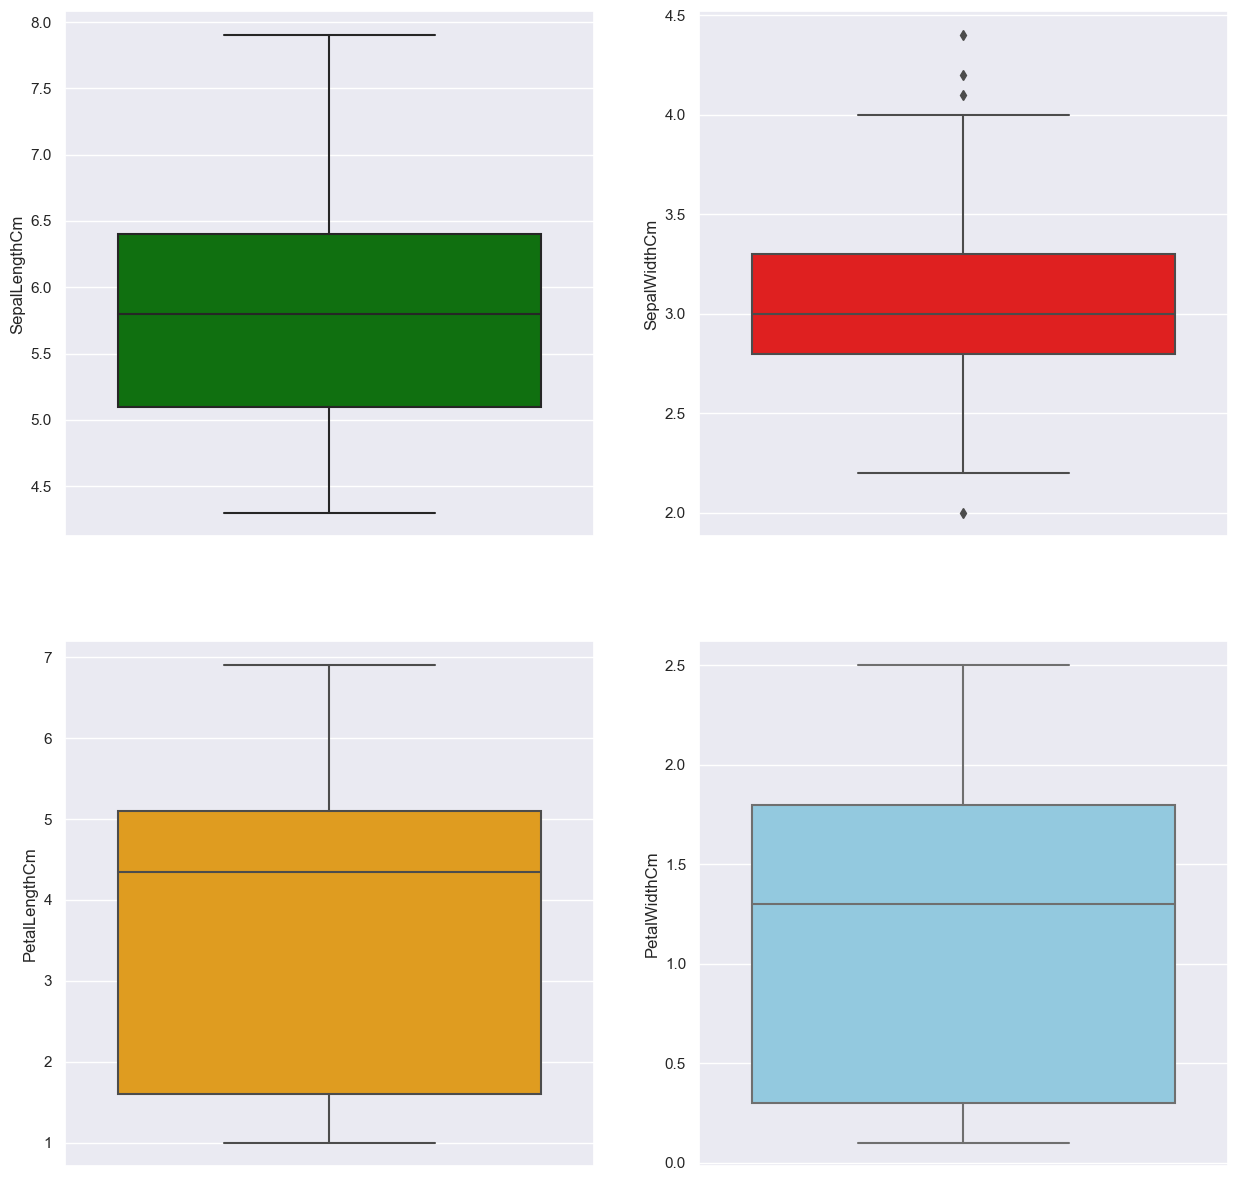

In [15]:
sns.set(style='darkgrid')
fig,axs1=plt.subplots(2,2,figsize=(15,15))
sns.boxplot(data=data,y='SepalLengthCm',ax=axs1[0,0],color='green')
sns.boxplot(data=data,y='SepalWidthCm',ax=axs1[0,1],color='red')
sns.boxplot(data=data,y='PetalLengthCm',ax=axs1[1,0],color='orange')
sns.boxplot(data=data,y='PetalWidthCm',ax=axs1[1,1],color='skyblue')

## Interpretation: Using boxplot In SepalLengthCm outliers are not present.and we can see that there are some outlier predict in SepalWidthCm,PetalLength

### Pair Plot

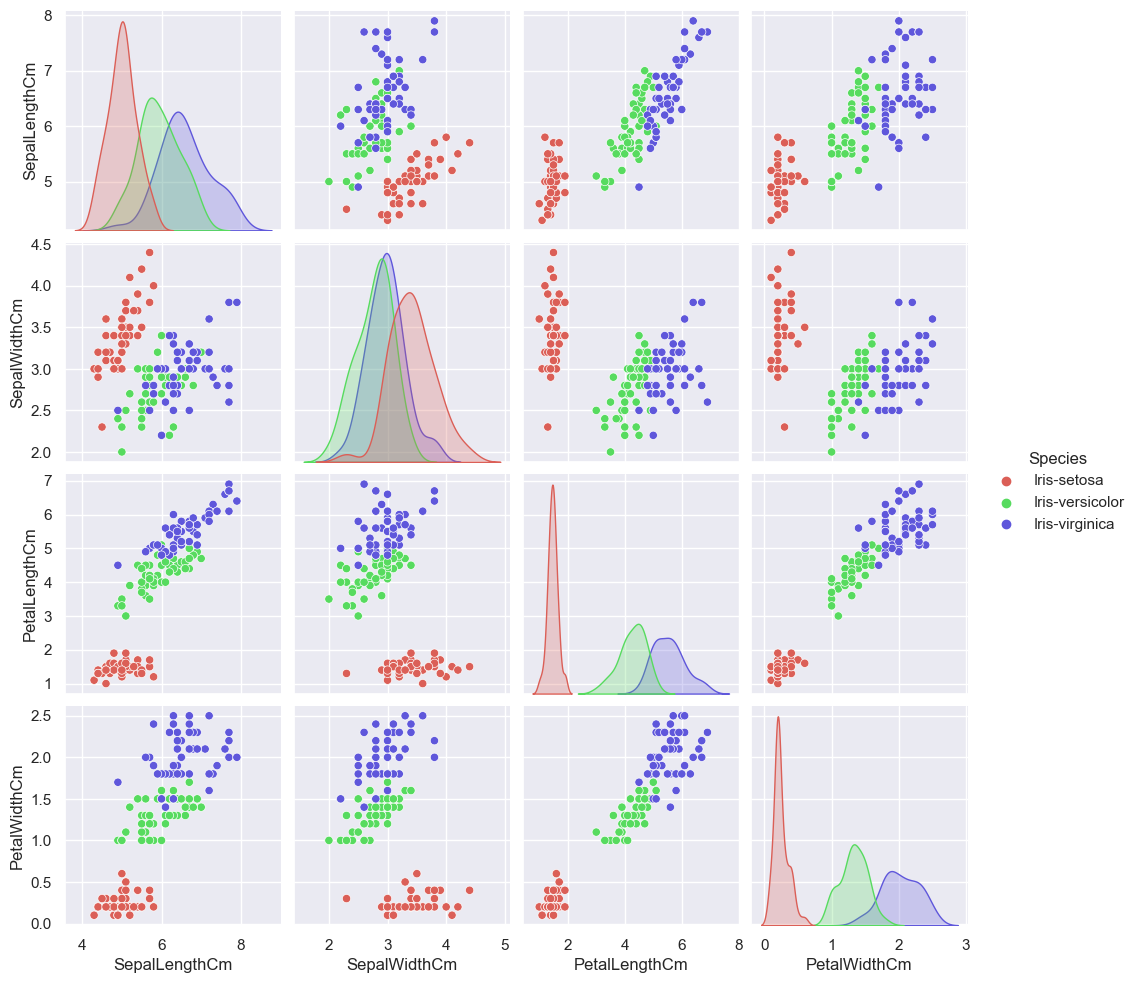

In [16]:
sns.pairplot(data,hue='Species',palette='hls')

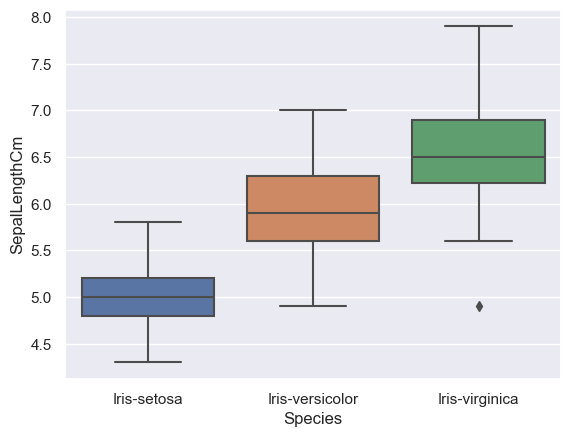

In [17]:
sns.boxplot(x=data.Species,y=data.SepalLengthCm)
plt.show()

### From above boxplot 'Iris-virginica' one outlier is detected

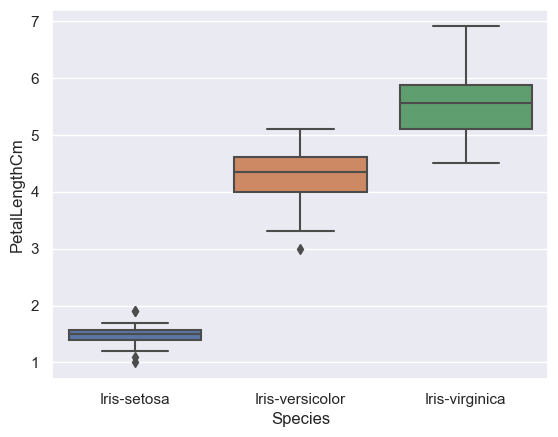

In [18]:
sns.boxplot(x=data.Species,y=data.PetalLengthCm)
plt.show()

<Axes: >

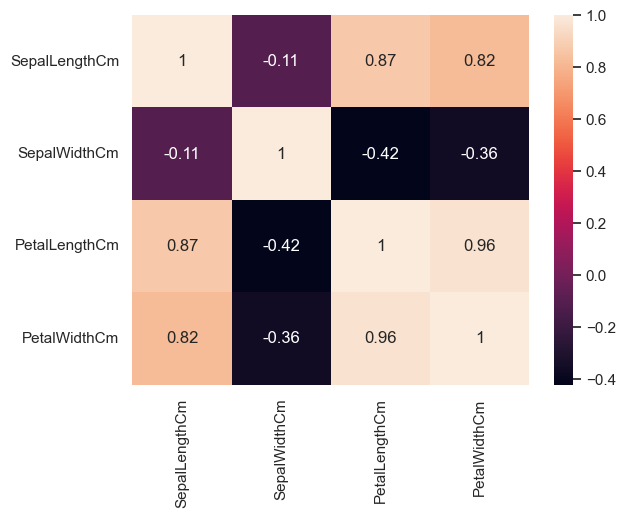

In [19]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

### Interpretation: heatmap show that a correlation of PetalLengthCm and PetalWidthCm is high

## Splitting Target

In [20]:
x=data.drop(columns='Species',axis=1)
y=data['Species']

In [21]:
print(x)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [22]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


## Splitting data into Train and Test

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [24]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
131,7.9,3.8,6.4,2.0
36,5.5,3.5,1.3,0.2
31,5.4,3.4,1.5,0.4
81,5.5,2.4,3.7,1.0
116,6.5,3.0,5.5,1.8
...,...,...,...,...
48,5.3,3.7,1.5,0.2
82,5.8,2.7,3.9,1.2
76,6.8,2.8,4.8,1.4
141,6.9,3.1,5.1,2.3


In [25]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
17,5.1,3.5,1.4,0.3
128,6.4,2.8,5.6,2.1
26,5.0,3.4,1.6,0.4
68,6.2,2.2,4.5,1.5
65,6.7,3.1,4.4,1.4
71,6.1,2.8,4.0,1.3
38,4.4,3.0,1.3,0.2
133,6.3,2.8,5.1,1.5
107,7.3,2.9,6.3,1.8
41,4.5,2.3,1.3,0.3


In [26]:
print(x.shape,X_train.shape,X_test.shape)

(150, 4) (105, 4) (45, 4)


In [27]:
print('Training data shape : {}.'.format(X_train.shape))
print('Training label shape : {}.'.format(y_train.shape))
print('Testing data shape : {}.'.format(X_test.shape))
print('Testing label shape : {}.'.format(y_test.shape))

Training data shape : (105, 4).
Training label shape : (105,).
Testing data shape : (45, 4).
Testing label shape : (45,).


## Model Building

## 1. Support Vector Machine Algorithm

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC

In [29]:
model_svm = SVC()

In [30]:
# Fit the Support Vector Machine model on Training dataset
model_svm.fit(X_train,y_train)

SVC()

In [31]:
pred = model_svm.predict(X_test)
pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [32]:
accuracy_score(y_test,pred)

0.9111111111111111

### Accuracy For our model is 93.33%

In [33]:
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))

Confusion Matrix
[[17  0  0]
 [ 0 11  0]
 [ 0  4 13]]


In [34]:
## Let's check the classification report aslo

print("Classification Report")
print(classification_report(y_test, pred))

Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.73      1.00      0.85        11
 Iris-virginica       1.00      0.76      0.87        17

       accuracy                           0.91        45
      macro avg       0.91      0.92      0.90        45
   weighted avg       0.93      0.91      0.91        45



## 2. Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel=LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [37]:
from sklearn. metrics import accuracy_score, confusion_matrix
predictions= logmodel. predict(X_test)

In [38]:
percentage= logmodel.score(X_test,y_test)
res=confusion_matrix(y_test,predictions)
print("Confusion matrix")
print(res)

Confusion matrix
[[17  0  0]
 [ 0 11  0]
 [ 0  3 14]]


In [39]:
#check the accuracy on the training set
print(logmodel.score(X_train,y_train))

0.9714285714285714


In [40]:
print(f"Test set:{len(X_test)}")

Test set:45


In [41]:
print(f"Accuracy={percentage*100}%")

Accuracy=93.33333333333333%


## 3. Naive Bayes Algorithm

In [42]:
from sklearn.naive_bayes import GaussianNB
accuracies={}
nb=GaussianNB()
nb.fit(X_train,y_train)
acc=nb.score(X_test,y_test)*100
accuracies['Naive Bayes']=acc
print("Accuracy of Naive Bayes:{:.2f}%".format(acc))

Accuracy of Naive Bayes:95.56%


In [43]:
nb.score(X_train,y_train)*100

96.19047619047619

# Conclusion :

## 1. Support Vector Machine Algorithm gives 93.33 % Accuracy

## 2. Logistic Regression gives 95.55 % Accuracy

## 3. Naive Bayes Algorithm gives 95.56%

# Thank You